In [8]:
CODE_DIR = "/home/cbarkhof/fall-2021"

ANALYSIS_DIR = f"{CODE_DIR}/analysis/analysis-files"
CHECKPOINT_DIR = f"{CODE_DIR}/run_files/checkpoints"

ENCODE_RECONSTUCT_FILE = f"encode-reconstruct-test-valid.pt"
SAMPLE_FILE = f"generative-samples.pt"
CONDITIONAL_SAMPLE_FILE = f"generative-conditional-samples.pt"

AVG_DATA_SAMPLE_FILE = f"{CODE_DIR}/analysis/analysis-files/average_val_data_samples_per_class.p"

SURPRISAL_RECONSTRUCT_FILE = "surprisal_reconstruct.pt"
SURPRISAL_SAMPLE_FILE = "surprisal_sample.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"
SURPRISAL_COND_SAMPLE_FILE = "surprisal_conditional_sample.pt"

TEST_VALID_EVAL_FILE = "test-valid-results.pt"

KNN_PREDICT_SAMPLES_FILE = "knn-preds-generative-samples.pickle"
KNN_PREDICT_CONDITIONAL_SAMPLES_FILE = "knn-preds-conditional-generative-samples.pickle"
KNN_PREDICT_RECONSTRUCTIONS_FILE = "knn-preds-reconstructions.pickle"

KNN_PREDICT_STATS_FILE = "knn-preds-stats.pickle"

DATA_SPACE_STATS = "data_space_stats.pickle"

REDO_MMD_RESULT_FILE = "redo_mmd.pt"

In [3]:
import os
import torch
import pickle

%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns; sns.set()

import sys
sys.path.append(CODE_DIR)

In [4]:
from analysis.MNIST_analysis.analysis_steps import make_run_overview_df

prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) "]
run_df = make_run_overview_df(prefixes=prefixes, add_data_group=False)
run_df

,objective,l_rate,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
MDR-VAE 40 dec: CNN.T,MDR-VAE,0,0,0,40,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) ...
MDR-VAE 32 dec: CNN.T,MDR-VAE,0,0,0,32,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=32.0] | q(z|x) ...
MDR-VAE 24 dec: CNN.T,MDR-VAE,0,0,0,24,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=24.0] | q(z|x) ...
MDR-VAE 16 dec: CNN.T,MDR-VAE,0,0,0,16,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=16.0] | q(z|x) ...
MDR-VAE 8 dec: CNN.T,MDR-VAE,0,0,0,8,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=8.0] | q(z|x) i...
...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


In [5]:
from analysis.MNIST_analysis.analysis_steps import overview_of_missing_analysis

df_missing = overview_of_missing_analysis(run_df)
df_missing.sum(axis=0)

Series([], dtype: float64)

In [9]:
from torch_two_sample import MMDStatistic

def mmd_fn(z_post):
    # Random row shuffle
    z_post = z_post[torch.randperm(z_post.size()[0])]
    # Random subset
    z_post = z_post[:5000, :]
    with torch.no_grad():
        # [S, B, D] -> [B, D]
#         z_post = z_post.reshape(-1, z_post.shape[-1])

    #     prior_sample = p_z.sample(sample_shape=(z_post.shape[0],))
        prior_sample = torch.randn_like(z_post)  # .to(z_post.device)

        alphas = [0.1 * i for i in range(5)]  # TODO: no clue for these...

        n_1, n_2 = len(z_post), len(prior_sample)
        MMD_stat = MMDStatistic(n_1, n_2)
        tts_mmd = MMD_stat(z_post, prior_sample, alphas, ret_matrix=False)
        print(tts_mmd.item())
        return tts_mmd.item()

all_stats = dict()

run_names = list(run_df["run_name"].values) # + ["data_group"]

for i, run_name in enumerate(run_names):
    save_dir = f"{ANALYSIS_DIR}/{run_name}"

    # skip things that are not directories
    if os.path.isfile(save_dir):
        continue
        
    print(i, run_name)

    all_stats[run_name] = dict()
    
    # Redo MMD
    if not os.path.isfile(f"{save_dir}/{REDO_MMD_RESULT_FILE}"):
        print("redo mmd scores")
        if os.path.isfile(f"{save_dir}/{ENCODE_RECONSTUCT_FILE}"):
            mmd_redo = dict()
            d = torch.load(f"{save_dir}/{ENCODE_RECONSTUCT_FILE}")
            for phase in ["train", "test", "valid"]:
                z = d[phase]["z"]
                mmd_redo["mmd_redo_" + phase] = mmd_fn(z)

            d = torch.load(f"{save_dir}/{SAMPLE_FILE}")
            z = d["z"]
            mmd_redo["mmd_redo_" + "samples"] = mmd_fn(z)
            torch.save(mmd_redo, f"{save_dir}/{REDO_MMD_RESULT_FILE}")
            for k, v in mmd_redo.items():
                all_stats[run_name][k] = v
    else:
        mmd_redo = torch.load(f"{save_dir}/{REDO_MMD_RESULT_FILE}")
        for k, v in mmd_redo.items():
            all_stats[run_name][k] = v
                

    # TEST / VALID SIMPLE EVAL
    if os.path.isfile(f"{save_dir}/{TEST_VALID_EVAL_FILE}"):
        d = torch.load(f"{save_dir}/{TEST_VALID_EVAL_FILE}")
        for phase in ["test", "valid"]:
            for k, v in d[phase].items():
                # if type(v) != float: print("Warning none float value for k", k, type(v), v)
                if " mean" in k and not "mmd" in k:
                    all_stats[run_name][phase+"-"+k] = v
    
    # SUPRISAL STATS
    if os.path.isfile(f"{save_dir}/{SURPRISAL_DATA_FILE}"):
        d = torch.load(f"{save_dir}/{SURPRISAL_DATA_FILE}")
        # print(d.keys())
        all_stats[run_name]["surp_data_test"] = torch.mean(d["test"]).item()
        all_stats[run_name]["surp_data_valid"] = torch.mean(d["valid"]).item()
        # all_stats[run_name]["surp_data_train"] = torch.mean(d["train"]).item()
    
    if os.path.isfile(f"{save_dir}/{SURPRISAL_SAMPLE_FILE}"):
        d = torch.load(f"{save_dir}/{SURPRISAL_SAMPLE_FILE}")
        all_stats[run_name]["surp_samples"] = torch.mean(d).item()
    
    if os.path.isfile(f"{save_dir}/{SURPRISAL_RECONSTRUCT_FILE}"):
        d = torch.load(f"{save_dir}/{SURPRISAL_RECONSTRUCT_FILE}")
        all_stats[run_name]["surp_recon_test"] = torch.mean(d["test"]).item()
        all_stats[run_name]["surp_recon_valid"] = torch.mean(d["valid"]).item()
        # all_stats[run_name]["surp_recon_train"] = torch.mean(d["train"]).item()
        
    # DATA SPACE STATS
    if os.path.isfile(f"{save_dir}/{KNN_PREDICT_STATS_FILE}"):
        d = pickle.load(open(f"{save_dir}/{KNN_PREDICT_STATS_FILE}", "rb"))
        for phase in ['test', 'valid', 'samples']:
            for k, v in d[phase].items():
                all_stats[run_name][f"ds_{phase}_{k}"] = v
    
    save_keys = ['L_0_sample_avg', 'KL_marg_sample_dist_data_dist', 'KL_marg_sample_dist_uniform', 'avg_class_L2']
    if os.path.isfile(f"{save_dir}/{DATA_SPACE_STATS}"):
        d = pickle.load(open(f"{save_dir}/{DATA_SPACE_STATS}", "rb"))
        for k, v in d.items():
            if k in save_keys:
                all_stats[run_name][f"ds_{k}"] = v

0 (mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-08-18:30:40
1 (mdr-vae-exp 8 oct) MDR-VAE[R>=32.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-08-17:54:06
2 (mdr-vae-exp 8 oct) MDR-VAE[R>=24.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-08-17:44:05
3 (mdr-vae-exp 8 oct) MDR-VAE[R>=16.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-08-17:37:05
4 (mdr-vae-exp 8 oct) MDR-VAE[R>=8.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-08-17:27:34
5 (mdr-vae-exp 8 oct) MDR-VAE[R>=4.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-08-16:21:06
6 (mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) independent_gaussi

54 (inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2_mmd=1000.0] | q(z|x) independent_gaussian | p(x|z) basic_deconv_decoder | p(z) isotropic_gaussian | D = 10 | 2021-10-05-18:13:17
55 (inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2_mmd=1000.0] | q(z|x) independent_gaussian | p(x|z) cond_pixel_cnn_pp | p(z) isotropic_gaussian | D = 10 | 2021-10-05-17:59:28
56 (inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2_mmd=100.0] | q(z|x) independent_gaussian | p(x|z) cond_pixel_cnn_pp | p(z) isotropic_gaussian | D = 10 | 2021-10-05-16:50:21
57 (inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2_mmd=1.0] | q(z|x) independent_gaussian | p(x|z) cond_pixel_cnn_pp | p(z) isotropic_gaussian | D = 10 | 2021-10-05-16:38:22
58 (inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l_2_mmd=100.0] | q(z|x) independent_gaussian | p(x|z) cond_pixel_cnn_pp | p(z) isotropic_gaussian | D = 10 | 2021-10-05-16:38:15
59 (inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l_2_mmd=1.0] | q(z|x) independent_gaussian | p(x|z) cond_pixel_cnn_pp | 

In [10]:
import pandas as pd

df_stats = pd.DataFrame(all_stats).transpose()
df_all = pd.merge(df_stats, run_df, left_index=True, right_on='run_name')
df_all

,mmd_redo_train,mmd_redo_test,mmd_redo_valid,mmd_redo_samples,test-elbo mean,test-distortion mean,test-kl_prior_post mean,test-mean_mean mean,test-std_across_x_mean mean,test-std_across_z_mean mean,...,ds_samples_kl_marg_uniform,ds_samples_kl_marg_uniform_mean,objective,l_rate,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
MDR-VAE 40 dec: CNN.T,0.148676,0.148580,0.151559,0.000480,-106.902903,67.414677,39.488227,0.093015,0.975640,1.477221,...,0.075279,0.075279,MDR-VAE,0,0,0,40,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) ...
MDR-VAE 32 dec: CNN.T,0.072425,0.075436,0.070986,-0.000122,-99.549787,67.518255,32.031532,-0.067943,0.829338,1.141922,...,0.092134,0.092134,MDR-VAE,0,0,0,32,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=32.0] | q(z|x) ...
MDR-VAE 24 dec: CNN.T,0.018074,0.019780,0.017295,0.000195,-93.471965,69.465280,24.006684,-0.005048,0.786114,1.031455,...,0.033127,0.033127,MDR-VAE,0,0,0,24,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=24.0] | q(z|x) ...
MDR-VAE 16 dec: CNN.T,0.010574,0.012506,0.010987,0.000082,-92.505230,72.048037,20.457192,-0.008635,0.770333,1.001247,...,0.034834,0.034834,MDR-VAE,0,0,0,16,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=16.0] | q(z|x) ...
MDR-VAE 8 dec: CNN.T,0.012640,0.011564,0.011512,-0.000972,-92.592765,72.041017,20.551747,-0.023901,0.776594,1.003055,...,0.031510,0.031510,MDR-VAE,0,0,0,8,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=8.0] | q(z|x) i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,-0.000046,0.000099,-0.000186,-0.000517,-205.897719,205.897658,0.000059,-0.001034,0.000001,0.003076,...,0.600395,0.600395,INFO-VAE,100,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,0.000180,0.000035,0.000098,0.000390,-205.839918,205.839918,0.000006,-0.000004,0.000000,0.000230,...,0.545713,0.545713,INFO-VAE,1000,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,0.000153,0.000058,-0.000179,-0.000271,-80.759597,80.758621,0.000976,0.003157,0.000021,0.012536,...,0.032366,0.032366,INFO-VAE,100,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,0.000242,0.000229,-0.000021,-0.000281,-206.374796,206.372991,0.001808,0.003671,0.000003,0.015112,...,0.581788,0.581788,INFO-VAE,1,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


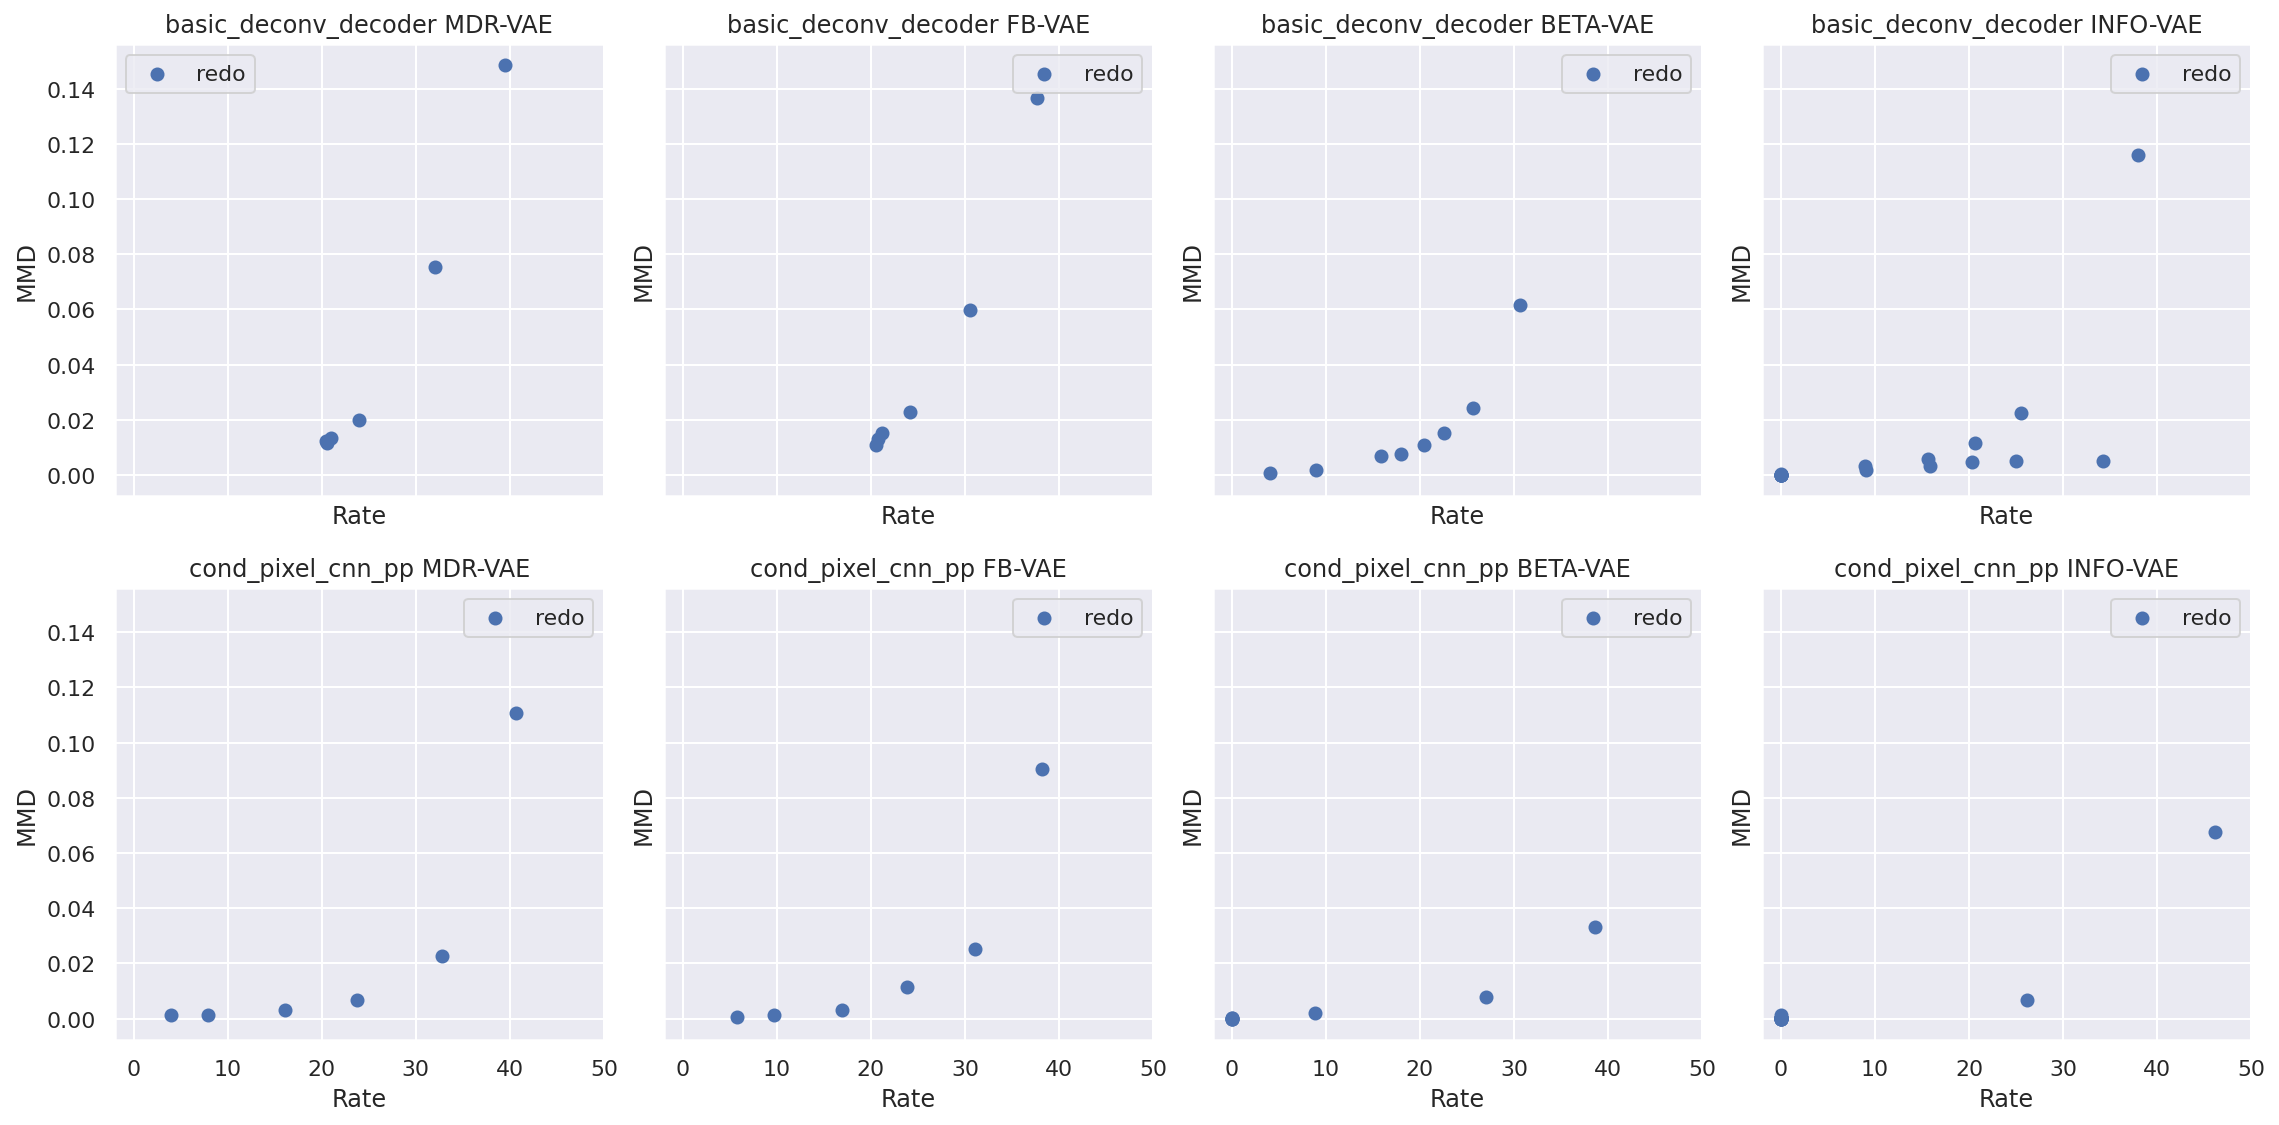

In [11]:
import seaborn as sns; sns.set()

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 8), sharex=True, sharey=True)
for col, objective in enumerate(df_all.objective.unique()):
    for row, decoder in enumerate(df_all.decoder.unique()):
        select = df_all[(df_all["objective"] == objective) & (df_all["decoder"] == decoder)]
#         axs[row, col].scatter(select["test-kl_prior_post mean"].astype(float).values, select["test-mmd mean"].astype(float).values, label="og")
        axs[row, col].scatter(select["test-kl_prior_post mean"].astype(float).values, select["mmd_redo_test"].astype(float).values, label="redo")
        
#         sns.regplot(x=select["test-kl_prior_post mean"].astype(float).values, ci=None, y=select["test-mmd mean"].astype(float).values, ax=axs[row, col])
        axs[row, col].set_title(f"{decoder} {objective}")
        
        axs[row, col].set_xlim([-2, 50])
#         axs[row, col].set_ylim([-0.05, 0.8])
        axs[row, col].set_xlabel("Rate")
        axs[row, col].set_ylabel("MMD")
        axs[row, col].legend()

plt.tight_layout()
plt.show()

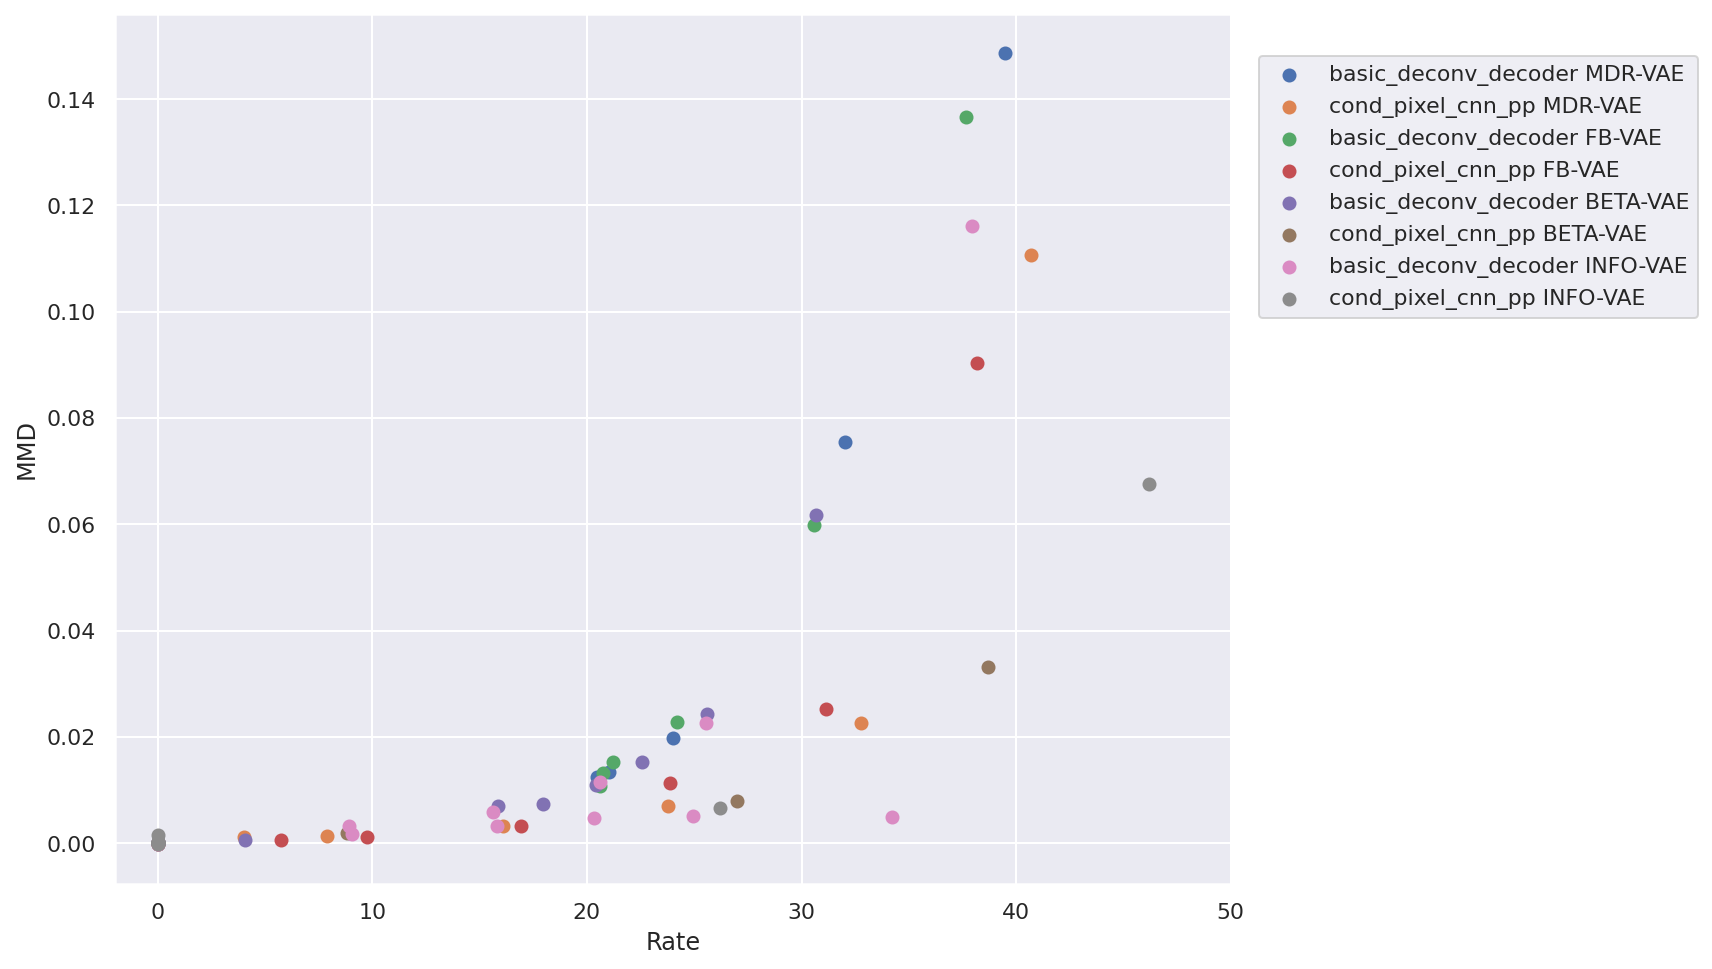

In [12]:
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(10, 8))
for col, objective in enumerate(df_all.objective.unique()):
    for row, decoder in enumerate(df_all.decoder.unique()):
        select = df_all[(df_all["objective"] == objective) & (df_all["decoder"] == decoder)]
        ax.scatter(select["test-kl_prior_post mean"].values, select["mmd_redo_test"].values, label=f"{decoder} {objective}")
#         sns.regplot(x=select["test-kl_prior_post mean"].astype(float).values, 
#                     y=select["test-mmd mean"].astype(float).values, 
#                     ax=ax, label=f"{decoder} {objective}")
#         axs[row, col].set_title()       
        ax.set_xlim([-2, 50])
#         ax.set_ylim([-0.05, 0.6])
        
plt.legend(loc=(1.025, 0.65))
plt.xlabel("Rate")
plt.ylabel("MMD")
plt.show()

In [13]:
# f, ax = plt.subplots(figsize=(14, 14))
# corr = df_all.dropna(axis=0).corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     xticklabels=True, yticklabels=True,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )

# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [14]:
def plot_x_y_colour(DF, x_col, y_col, c_col, annotate_text=True, adjust_t=False, save_path=None, x_lim=None):
    cols = ["objective", "decoder", x_col, y_col, c_col]
    for c in cols:
        assert c in DF.columns, f"{c} not present in DF"
        
    fig, ax = plt.subplots(figsize=(20, 8))
    
    

    for dec, m in zip(["cond_pixel_cnn_pp", "basic_deconv_decoder"], ["s", "o"]):
        df_select = DF[(DF["decoder"] == dec)]
        df_select.dropna(axis=0).plot.scatter(x=x_col, y=y_col, marker=m, cmap="viridis",
                                              ax=ax, c=c_col, s=60, alpha=0.7)
    
    if annotate_text:
        texts = []
        for index, row in DF.iterrows():
            x, y = row[x_col], row[y_col]
        
            if row["objective"] == "INFO-VAE":
                l_mmd = row["l_mmd"]
                l_rate = row["l_rate"]
                t = ax.text(x, y, f"(i {l_rate}, {l_mmd})", size=8)

            elif row["objective"] == "BETA-VAE":
                beta = row["beta_beta"]
                t = ax.text(x, y, f"(b {beta})", size=8)

            elif row["objective"] == "FB-VAE":
                fb = row["free_bits"]
                t = ax.text(x, y, f"(fb {fb})", size=8)

            elif row["objective"] == "MDR-VAE":
                mdr = row["mdr_value"]
                t = ax.text(x, y, f"(mdr {mdr})", size=8)
            
            texts.append(t)
        
        if adjust_t:
            adjust_text(texts)
            
    fig.delaxes(fig.axes[-1])
    
    if x_lim is not None:
        ax.set_xlim(x_lim)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    title = f"{x_col} versus {y_col}, (coloured by {c_col})"
    
    if annotate_text:
        title += "\n\nINFO-VAE: (l_rate, l_mmd) | BETA-VAE: (beta) | " \
                 "FB-VAE: (free_bits) | MDR-VAE: (rate)"
    
    ax.set_title(title,  y=1.05 if annotate_text else 1.01)
    
    if save_path is not None:
        p = f"{save_path}/scatter-X-{x_col}-Y-{y_col}-C-{c_col}.jpg"
        plt.savefig(p, dpi=300)
        
    plt.show()

In [15]:
df_all.columns

Index(['mmd_redo_train', 'mmd_redo_test', 'mmd_redo_valid', 'mmd_redo_samples',
       'test-elbo mean', 'test-distortion mean', 'test-kl_prior_post mean',
       'test-mean_mean mean', 'test-std_across_x_mean mean',
       'test-std_across_z_mean mean', 'test-mean_scale mean',
       'test-std_across_x_scale mean', 'test-std_across_z_scale mean',
       'valid-elbo mean', 'valid-distortion mean', 'valid-kl_prior_post mean',
       'valid-mean_mean mean', 'valid-std_across_x_mean mean',
       'valid-std_across_z_mean mean', 'valid-mean_scale mean',
       'valid-std_across_x_scale mean', 'valid-std_across_z_scale mean',
       'surp_data_test', 'surp_data_valid', 'surp_samples', 'surp_recon_test',
       'surp_recon_valid', 'ds_test_kl_instance_marg_pred',
       'ds_test_kl_instance_marg_pred_mean', 'ds_test_kl_marg_uniform',
       'ds_test_kl_marg_uniform_mean', 'ds_test_kl_marg_marg_data',
       'ds_test_kl_marg_marg_data_mean', 'ds_valid_kl_instance_marg_pred',
       'ds_valid_

# D, R + MMD

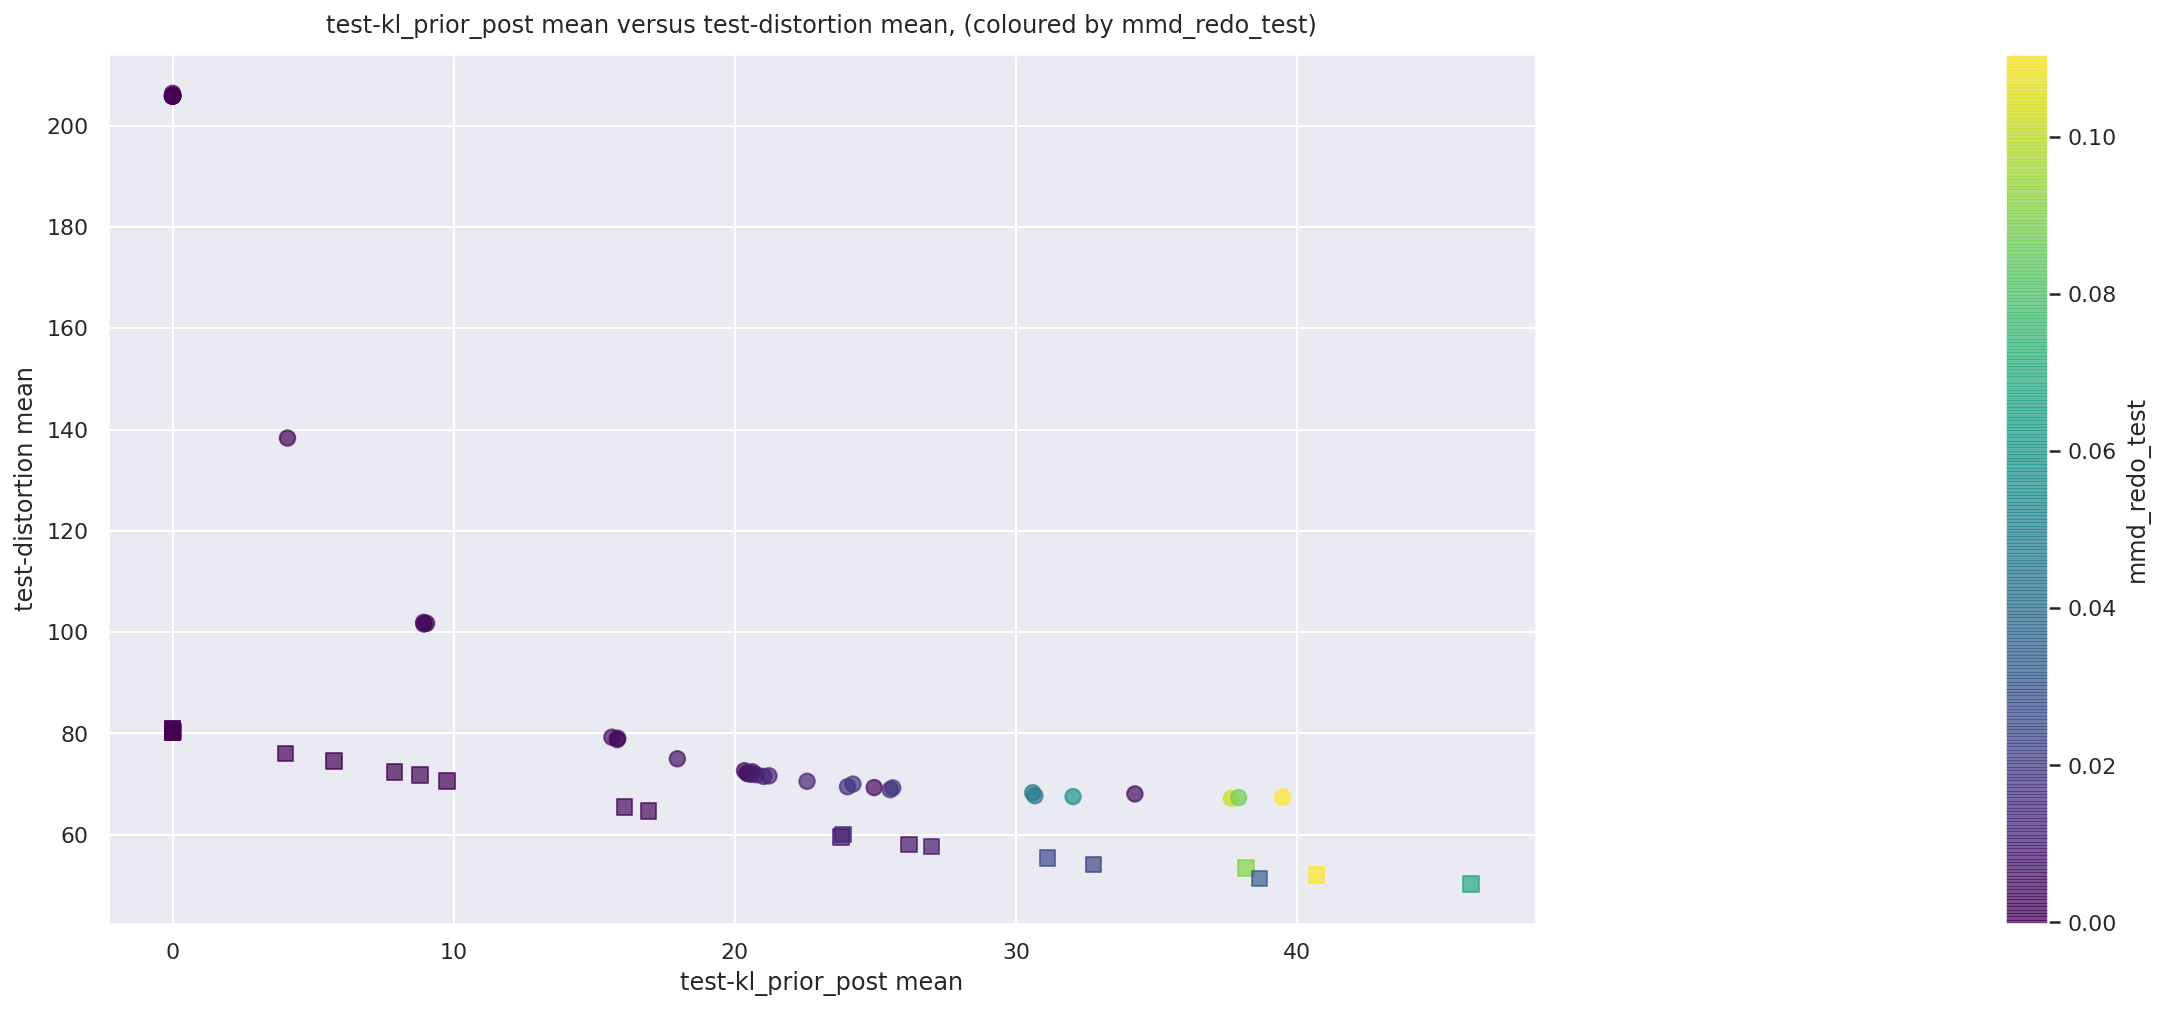

In [16]:
# D-R with colour showing MMD (and then annotation for objectives)
plot_x_y_colour(DF=df_all,
                x_col='test-kl_prior_post mean', 
                y_col='test-distortion mean', 
                c_col='mmd_redo_test',
                annotate_text=False,
                adjust_t=False)

# ELBO, MMD + R

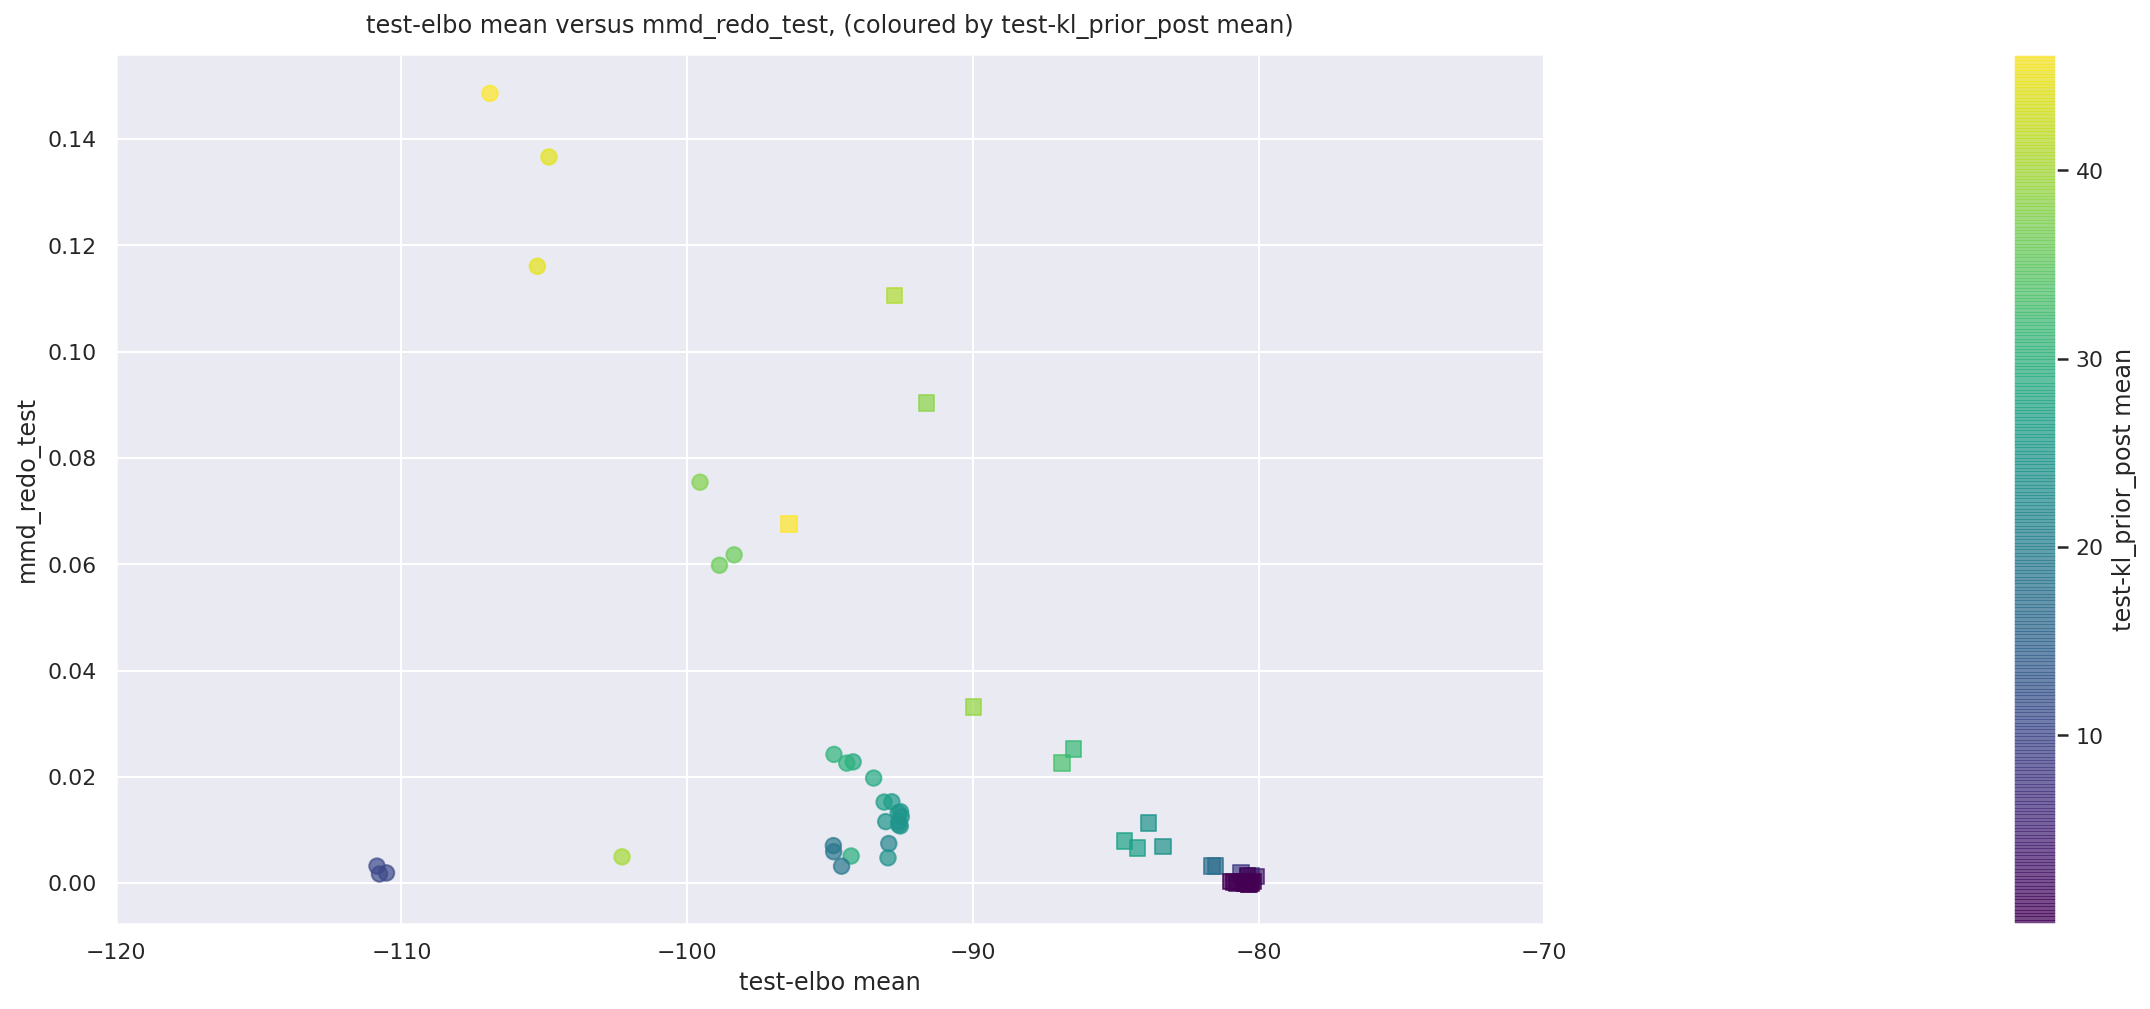

In [17]:
# and ELBO-MMD with colour showing Rate (rather than objective), and then annotation for objectives.
plot_x_y_colour(DF=df_all,
                x_col='test-elbo mean', 
                y_col='mmd_redo_test', 
                c_col='test-kl_prior_post mean',
                annotate_text=False,
                adjust_t=False, 
                x_lim=(-120, -70))